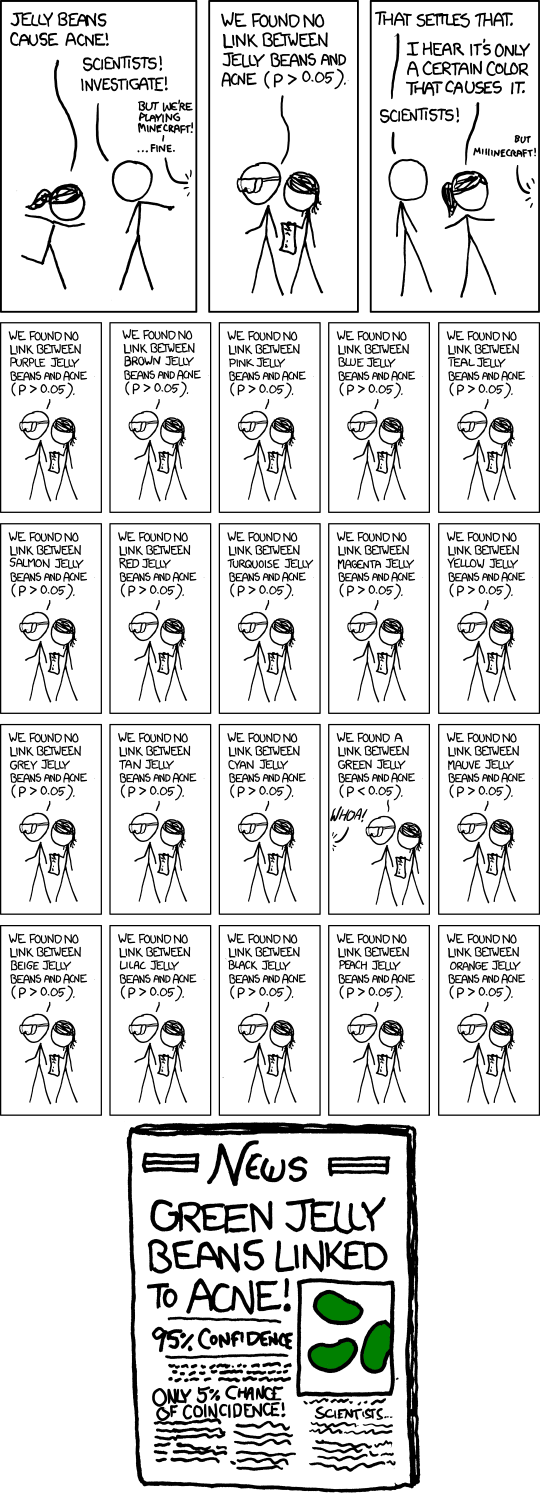

As always we start with some useful imports

In [39]:
import pandas as pd
import numpy as np

In [40]:
dice = ['Purple', 'Brown', 'Pink', 'Blue', 'Teal', 
        'Salmon', 'Red', 'Turquoise', 'Magenta', 'Yellow', 
        'Grey', 'Tan', 'Cyan', 'Green', 'Mauve',
        'Beige', 'Lilac', 'Black', 'Peach', 'Orange']

def dice_experiments(dice, n):
    df = pd.DataFrame(index=dice, columns=['Number of Six'])
    for die in dice:
        result = np.random.randint(1, 7, n)
        df.loc[die,'Number of Six'] = np.sum(result==6)
    return df

np.random.seed(89231)
df = dice_experiments(dice, 1000)
print(df)

          Number of Six
Purple              191
Brown               170
Pink                175
Blue                176
Teal                176
Salmon              182
Red                 174
Turquoise           176
Magenta             152
Yellow              168
Grey                144
Tan                 162
Cyan                153
Green               186
Mauve               174
Beige               177
Lilac               152
Black               173
Peach               167
Orange              179


The purple die shows an unusually high occurrence of sixes with a frequency of 191, which is significantly above the expected average value of 167 (based on the assumption of fair dice, where each face has an equal probability of appearing). The probability of obtaining at least 191 sixes with fair dice is about 2%, as calculated below. This probability represents the p-value for the observed result with the pruple die. If we had pre-selected the pruple die for analysis before conducting the experiment, the low p-value would have justified a scientific publication.

In [41]:
def get_fraction_one_color(color, dice, k, n, repeat):
    success = 0.0
    for experiment in range(repeat):
        df = dice_experiments(dice, n)
        if df.loc['Purple','Number of Six'] >= k:
            success += 1
    return success/repeat

get_fraction_one_color('Purple', dice, 191, 1000, 1000)


0.026

The observed probability of obtaining at least 191 sixes with fair dice is about 2.6%, which is relatively low and suggests that the high frequency of sixes in the pruple die is not due to chance alone. Right?

We have realized that our previous conclusion was misleading due to a misinterpretation of our experimental procedure. Instead of testing each color separately, we actually ran the experiment for all 20 colors and then selected the color with the highest number of sixes as the one of interest. Therefore, the correct p-value for our hypothesis should be the probability that at least one of the colors obtains at least 191 sixes, rather than the probability of observing 191 sixes in the chosen color alone.

In [42]:
def get_fraction_any_color(dice, k, n, repeat):
    success = 0.0
    for experiment in range(repeat):
        df = dice_experiments(dice, n)
        if df['Number of Six'].max() >= k:
            success += 1
    return success/repeat

get_fraction_any_color(dice, 191, 1000, 1000)

0.357

The calculated probability of at least one color getting at least 191 sixes out of 1000 rolls is about 36%, which indicates that such an event is very likely to occur by chance alone. Therefore, we can conclude that there is nothing statistically significant or unusual about our dice, and the observed distribution of sixes is likely to be consistent with the expected distribution under the assumption of fair dice.

In [43]:
from scipy import stats

In [44]:
stats.binom(1000, 1/6.0).sf(190)

0.023009643421109952

This code calculates the probability of observing at least 191 sixes in a sequence of 1000 rolls of a fair six-sided die. It uses the binomial distribution function from the scipy.stats module to model the number of successful outcomes (i.e., rolling a six) in a fixed number of independent trials (i.e., dice rolls), assuming a constant probability of success for each trial (i.e., 1/6 for a fair die).

The first argument of the stats.binom() function is the number of trials, which is 1000 in this case. The second argument is the probability of success, which is 1/6.0 or approximately 0.1667 for a fair die.

The .sf() method is then used to calculate the survival function or the complement of the cumulative distribution function (CDF) for the binomial distribution. Specifically, it computes the probability of observing more than the specified number of successful outcomes (i.e., 190) in the given number of trials (i.e., 1000) under the assumed probability of success.

Therefore, the resulting value represents the probability of observing at least 191 sixes in 1000 rolls of a fair die, which is the complement of the probability of observing 190 or fewer sixes.

In [45]:
1 - (stats.binom(1000, 1/6.0).cdf(190)**20)

0.3722227975229496

This code calculates the probability of at least one color out of 20 colors getting at least 191 sixes in 1000 rolls of a fair six-sided die. It uses the same binomial distribution function from the scipy.stats module to model the number of successful outcomes (i.e., rolling a six) in a fixed number of independent trials (i.e., dice rolls), assuming a constant probability of success for each trial (i.e., 1/6 for a fair die).

The stats.binom() function is called with the same arguments as before: 1000 as the number of trials and 1/6.0 as the probability of success.

The .cdf() method is then used to calculate the cumulative distribution function of the binomial distribution. Specifically, it computes the probability of observing up to the specified number of successful outcomes (i.e., 190) in the given number of trials (i.e., 1000) under the assumed probability of success.

The expression stats.binom(1000, 1/6.0).cdf(190)**20 calculates the probability that none of the 20 colors get at least 191 sixes in 1000 rolls, assuming that the rolls for each color are independent and identically distributed.

Finally, the expression 1 - (stats.binom(1000, 1/6.0).cdf(190)**20) calculates the probability of at least one color out of 20 getting at least 191 sixes in 1000 rolls by taking the complement of the previous probability. This result represents the overall probability of the observed event, which is compared to a significance level (e.g., 0.05) to determine whether it is statistically significant or not.